### 1. String Permutations

##### Method 1: Using itertools

In [39]:
# Function to find permutations of a given string
from itertools import permutations

def str_perm(str):
      
     # Get all permutations of string 'ABC'
     perms = permutations(str)
     
     # Concat each permutation
     permList = []
     for perm in perms:
         permList.append(''.join(perm))
     
     # Leave only distinct permutations
     distinct = set(permList)
     
     # Turn the set into a list and sort it in an alphabetical order
     answer = list(distinct)
     answer.sort()
     
     return answer

In [40]:
s = 'abc'
str_perm(s)

['abc', 'acb', 'bac', 'bca', 'cab', 'cba']

In [41]:
s = 'abb'
str_perm(s)

['abb', 'bab', 'bba']

##### Method 2: recursion using backtracking
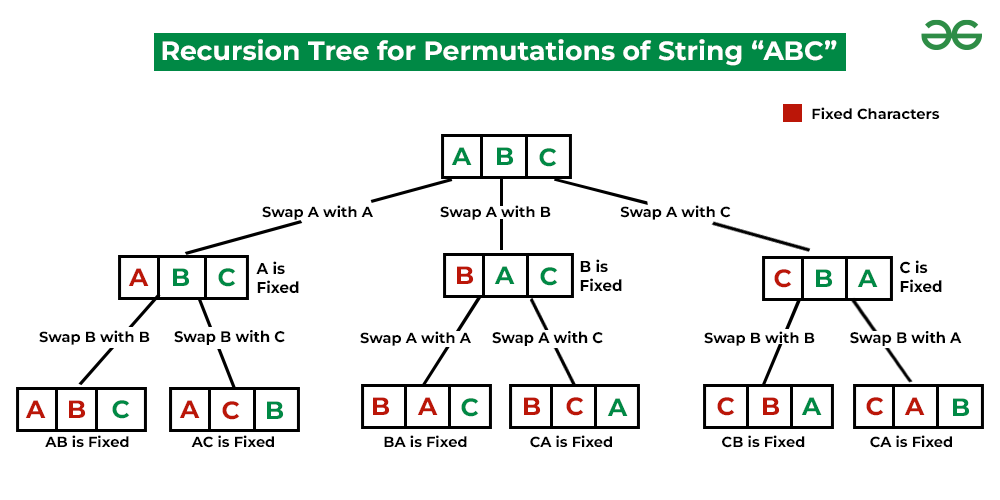

In [48]:
# Function to print permutations of string
# This function takes three parameters:
# 1. String elments in a list
# 2. Starting index of the string
# 3. Ending index of the string.

def permute(a, l, r, permList):
    # 위 그림의 tree에서 leaves에 해당하는 케이스들. 더이상 바꿀게 없으므로 permList에 더함
    if l == r:
        permList.append(''.join(a))
    else:
        for i in range(l, r):
            # swap the current element with a[l]
            a[l], a[i] = a[i], a[l]
            # based on this swapped state, do the same thing with a[l+1]
            permute(a, l+1, r, permList)
            # swap the previously swapped values to initiate backtracking
            a[l], a[i] = a[i], a[l]  

def str_perm(str):
    outList = []
      
    # Get all permutations of string 'ABC'
    permute(list(str), 0, len(str), outList)
     
    # Leave only distinct permutations
    distinct = set(outList)
     
    # Turn the set into a list and sort it in an alphabetical order
    answer = list(distinct)
    answer.sort()
     
    return answer

In [49]:
s = 'abc'
str_perm(s)

['abc', 'acb', 'bac', 'bca', 'cab', 'cba']

In [51]:
s = 'abb'
str_perm(s)

['abb', 'bab', 'bba']

### 2. Acyclic directed graph

In [52]:
# Node definition
class GNode:
    def __init__(self,id): # class 생성시 자동으로 실행
        self.id = id # id is a string
    def __str__(self): # class 내용 출력하고 싶을 때 형식을 지정하는 메서드
        return self.id

In [53]:
a, b, c, d = GNode('a'), GNode('b'), GNode('c'), GNode('d')
G = dict()
G[a], G[b], G[c], G[d] = [b,c], [d], [], [c]

In [113]:
# a recursive function to record all paths from 'cur' to 'dest'. Idea is to do Depth First Traversal
# visited: checks whether each node was visited in current path
# path: stores actual nodes of current path in order
def findPathsUntil(graph, cur, dest, visited, path, outPathList):
    # mark the current node as visited and store in path
    visited[cur] = True
    path.append(cur.id)
    
    # (1) if current node is same as destination, append to pathList
    if cur == dest:
        # append the copy of the path so that a found path is not modified by recursive calls
        outPathList.append(path[:])
        #print(path)
    # (2) if current node is not the same as destination, recur for all the nodes adjacent to this node
    else:
        for node in graph[cur]:
            if visited[node] == False:
                findPathsUntil(graph, node, dest, visited, path, outPathList)
                
    # remove current node from path and mark as unvisited, to let other paths to be explored
    path.pop()
    visited[cur] = False
    
def paths(graph, start, dest):
    # mark all the nodes as not visited
    visited = {}
    for node in graph:
        visited.setdefault(node,False)
    path = []
    answer = []
    
    findPathsUntil(graph, start, dest, visited, path, answer)
    
    return answer
    

In [112]:
paths(G,a,c)

{<__main__.GNode object at 0x105795360>: False, <__main__.GNode object at 0x105796890>: False, <__main__.GNode object at 0x105981360>: False, <__main__.GNode object at 0x105982320>: False}
[]


[['a', 'b', 'd', 'c'], ['a', 'c']]